In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from scipy import optimize
from scipy.interpolate import lagrange

In [39]:
datos=pd.DataFrame({"dias":[1,2,3,4,5,6], "IPMH":[464,494,532,552,576,589]})

In [40]:
datos

,dias,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


Agregamos una columna con los valores aleatorios de incertidumbre


In [41]:
#se agrega la columna
datos["IPMH2"]=datos.apply(lambda row: row.IPMH+np.random.uniform(-row.IPMH*0.002,row.IPMH*0.002),axis="columns")


In [42]:
datos

,dias,IPMH,IPMH2
0,1,464,464.697264
1,2,494,494.985703
2,3,532,531.080100
3,4,552,550.929161
4,5,576,575.484393
5,6,589,588.464221


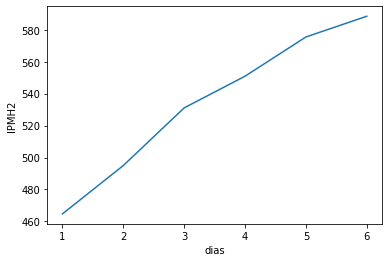

In [43]:
plt.figure()
plt.plot(datos.dias,datos.IPMH2)
plt.xlabel("dias")
plt.ylabel("IPMH2")
plt.show()

In [46]:
coeffs=np.polyfit(datos.dias,datos.IPMH2,2)

In [47]:
pol=np.poly1d(coeffs)

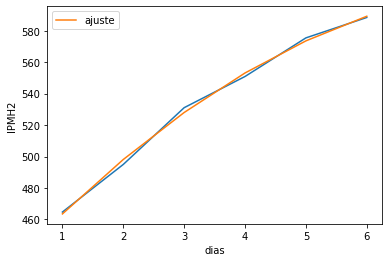

In [50]:
plt.figure()
plt.plot(datos.dias,datos.IPMH2)
plt.plot(datos.dias,pol(datos.dias),label="ajuste")
plt.xlabel("dias")
plt.ylabel("IPMH2")
plt.legend()
plt.show()

La ecuacion de caida libre es:

$$y(t)=y_0+v_ot+\frac{1}{2}at^{2}$$

In [68]:
print(f"la velocidad inicial es {coeffs[1]} IPMH/dia")

la velocidad inicial es 83.47092392793834 IPMH/dia


In [69]:
print(f"la aceleracion constante es {2*coeffs[0]} IPMH/dia^2")

la aceleracion constante es -4.739275524545151 IPMH/dia^2


para hallar el numero maximo de IPMH debemos calcular puntos criticos

In [56]:
#hallamos la derivada del polinomio
polprima=pol.deriv()

In [57]:
print(pol)

       2
-2.37 x + 41.74 x + 424.1


In [58]:
print(polprima)

 
-4.739 x + 41.74


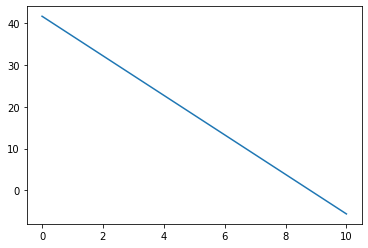

In [60]:
#grafiquemos polprima
x=np.linspace(0,10,10)
plt.plot(x,polprima(x))

In [61]:
#hallemos el punto critico
root=optimize.newton(polprima,8)

In [62]:
root

8.806295761412754

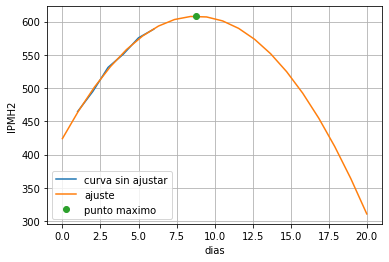

In [67]:
#mostremos graficamente este maximo
x=np.linspace(0,20,20)
plt.figure()
plt.plot(datos.dias,datos.IPMH2,label="curva sin ajustar")
plt.plot(x,pol(x),label="ajuste")
plt.plot(root,pol(root),"o",label="punto maximo")
plt.xlabel("dias")
plt.ylabel("IPMH2")
plt.grid()
plt.legend()
plt.show()

In [65]:
print(f"el numero de dias en el que se alcanzara el maximo es {root} y el IPMH maximo es de {pol(root)}")

el numero de dias en el que se alcanzara el maximo es 8.806295761412754 y el IPMH maximo es de 607.9062739833619
